In [56]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

gamesData=pd.read_csv(r"C:\Users\ttjrb\OneDrive\Desktop\University Important\summer 2024 work\projects\databases\ALL 1320 nba games 2022-23\games.csv")

In [57]:
gamesData.head(20)

,gameid,date,home,h_pts,away,a_pts,ot,type
0,22200001,2022-10-18T19:30:00Z,BOS,126,PHI,117,0,regular
1,22200002,2022-10-18T22:00:00Z,GSW,123,LAL,109,0,regular
2,22200003,2022-10-19T19:00:00Z,DET,113,ORL,109,0,regular
3,22200004,2022-10-19T19:00:00Z,IND,107,WAS,114,0,regular
4,22200008,2022-10-19T19:30:00Z,TOR,108,CLE,105,0,regular
5,22200007,2022-10-19T19:30:00Z,MIA,108,CHI,116,0,regular
6,22200009,2022-10-19T19:30:00Z,MEM,115,NYK,112,1,regular
7,22200005,2022-10-19T19:30:00Z,ATL,117,HOU,107,0,regular
8,22200006,2022-10-19T19:30:00Z,BKN,108,NOP,130,0,regular
9,22200010,2022-10-19T20:00:00Z,MIN,115,OKC,108,0,regular


In [58]:
df1= gamesData.set_index('home')
df1= df1.loc['BOS']

homeWin=0
homeLost=0
for i in range(len(df1)):
    if df1['h_pts'].iloc[i]>df1['a_pts'].iloc[i]:
       homeWin+=1
    else:
        homeLost+=1


#...............................................................................


df2= gamesData.set_index('away')
df2= df2.loc['BOS']

awayWin=0
awayLost=0
for i in range(len(df2)):
    if df2['h_pts'].iloc[i]<df2['a_pts'].iloc[i]:
       awayWin+=1
    else:
        awayLost+=1


In [59]:
teams= gamesData['home'].unique()
teamsRecordsList=[]

for team in teams:
    teamRecord={}
    df1= gamesData[gamesData['home']==team]
    homeWin=0
    homeLost=0
    for i in range(len(df1)):
        if df1['h_pts'].iloc[i]>df1['a_pts'].iloc[i]:
            homeWin+=1
        else:
            homeLost+=1


    df2= gamesData[gamesData['away']==team]
    awayWin=0
    awayLost=0
    for i in range(len(df2)):
        if df2['h_pts'].iloc[i]<df2['a_pts'].iloc[i]:
            awayWin+=1
        else:
            awayLost+=1


    teamRecord['name']= team
    teamRecord['homeWin']=homeWin
    teamRecord['awayWin']=awayWin
    teamRecord['totalWins']=homeWin+awayWin
    teamRecord['homeLost']=homeLost
    teamRecord['awayLost']=awayLost
    teamRecord['totalLosts']=homeLost+awayLost

    teamsRecordsList.append(teamRecord)

teamsRecords=pd.DataFrame(teamsRecordsList)
teamsRecords

,name,homeWin,awayWin,totalWins,homeLost,awayLost,totalLosts
0,BOS,37,31,68,15,19,34
1,GSW,37,13,50,10,35,45
2,DET,9,8,17,32,33,65
3,IND,20,15,35,21,26,47
4,TOR,27,14,41,15,27,42
5,MIA,34,24,58,19,30,49
6,MEM,37,16,53,7,28,35
7,ATL,25,19,44,19,26,45
8,BKN,23,22,45,20,21,41
9,MIN,24,20,44,20,25,45


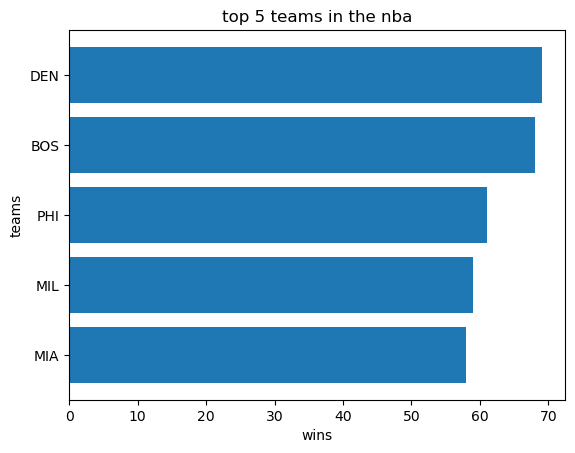

In [80]:
top5=teamsRecords.sort_values('totalWins', ascending=False).head(5)
bottom5=teamsRecords.sort_values('totalWins', ascending=False).tail(5)

plt.barh(top5['name'],top5['totalWins'])
plt.ylabel('teams')
plt.xlabel('wins')
plt.title('top 5 teams in the nba')
plt.gca().invert_yaxis()
plt.show()

In [82]:
def teamsRanking(order,k):
    if k in range(1,31):
        if order=="top":
            topk=teamsRecords.sort_values('totalWins', ascending=False).head(k)


            plt.barh(topk['name'],topk['totalWins'])
            plt.ylabel('teams')
            plt.xlabel('wins')
            plt.title('top '+ str(k)+ ' teams in the nba')
            plt.gca().invert_yaxis()
            plt.show()
        
        if order=="bottom":
                bottomk=teamsRecords.sort_values('totalWins', ascending=False).tail(k)

                plt.barh(bottomk['name'],bottomk['totalWins'])
                plt.ylabel('teams')
                plt.xlabel('wins')
                plt.title('bottom '+ str(k)+ ' teams in the nba')
                plt.show()
        else:
            return print('order should either be "top" or "bottom" ')
    else:
        return print('the number of teams ranges from 1 to 30')

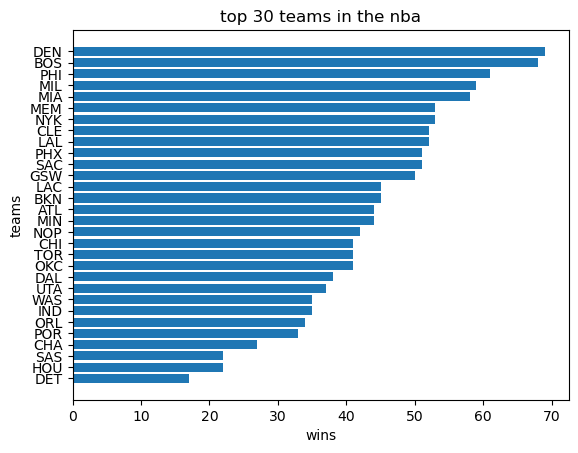

order should either be "top" or "bottom" 


In [83]:
teamsRanking("top",30)